In [220]:
import pandas as pd

In [221]:
emp_attrition=pd.read_csv(r"C:\Users\Hp\Desktop\employee_attrition_data.csv", header=0, sep=",")

In [222]:
emp_attrition.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [223]:
emp_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [224]:
emp_attrition.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

# What all thigs I will do here 
 1. Missing null values
 2. Explore about numerical and categorical features
 3. finding Relationship b/w features

In [225]:
emp_attrition.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [249]:
print(emp_attrition.duplicated().sum())

0


In [226]:
#No need of this method
[features for features in emp_attrition.columns if emp_attrition[features].isnull().sum()>0]

[]

In [227]:
#By this we can know numerical and categorical features , int64 and float64 are numerical features and object will be categorical features 
emp_attrition.dtypes  

Employee_ID                int64
Age                        int64
Gender                    object
Department                object
Job_Title                 object
Years_at_Company           int64
Satisfaction_Level       float64
Average_Monthly_Hours      int64
Promotion_Last_5Years      int64
Salary                     int64
Attrition                  int64
dtype: object

In [251]:
emp_attrition.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


#Promotion_Last_5Years & Attrition: Range: 0 to 1 (binary variable)

In [228]:
#By this also we can find numerical and categorical features
numerical_features=emp_attrition.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features=emp_attrition.select_dtypes(include=['object']).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Employee_ID', 'Age', 'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years', 'Salary', 'Attrition']
Categorical Features: ['Gender', 'Department', 'Job_Title']


#Analyzing the Distribution of Numerical Variables

In [230]:
print(emp_attrition[numerical_features].describe())

       Employee_ID          Age  Years_at_Company  Satisfaction_Level  \
count  1000.000000  1000.000000       1000.000000         1000.000000   
mean    499.500000    42.205000          5.605000            0.505995   
std     288.819436    10.016452          2.822223            0.289797   
min       0.000000    25.000000          1.000000            0.001376   
25%     249.750000    33.000000          3.000000            0.258866   
50%     499.500000    43.000000          6.000000            0.505675   
75%     749.250000    51.000000          8.000000            0.761135   
max     999.000000    59.000000         10.000000            0.999979   

       Average_Monthly_Hours  Promotion_Last_5Years        Salary    Attrition  
count            1000.000000            1000.000000   1000.000000  1000.000000  
mean              199.493000               0.486000  64624.980000     0.495000  
std                29.631908               0.500054  20262.984333     0.500225  
min               

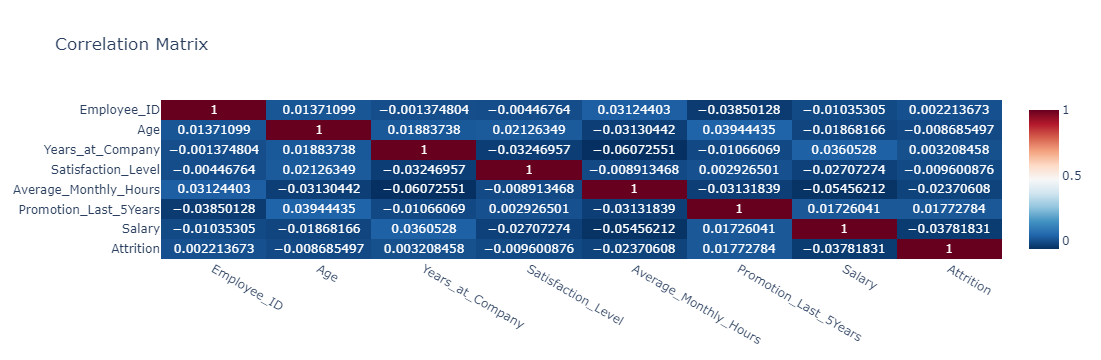

In [253]:
numerical_corr=emp_attrition[numerical_features].corr()

#Create heatmap
fig_corr=px.imshow(numerical_corr, text_auto=True, #automatically adds text annotations to the heatmap cells.
                aspect="auto",  #this will automatically adjusted to make the heatmap cells square.
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix')

fig_corr.show()

The diagonal values of the correlation matrix are all 1 because each variable is perfectly correlated with itself. The values in the correlation matrix range from -1 to 1.
1 indicates a perfect positive correlation: As one variable increases, the other variable also increases.
-1 indicates a perfect negative correlation: As one variable increases, the other variable decreases.
0 indicates no correlation: There is no linear relationship between the variables.

Years_at_Company vs. Salary: 0.03 (strong positive correlation)

In [231]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [232]:
import plotly.express as px

   Gender  Attrition  Attrition_Rate
0  Female   0.512146       51.214575
1    Male   0.478261       47.826087


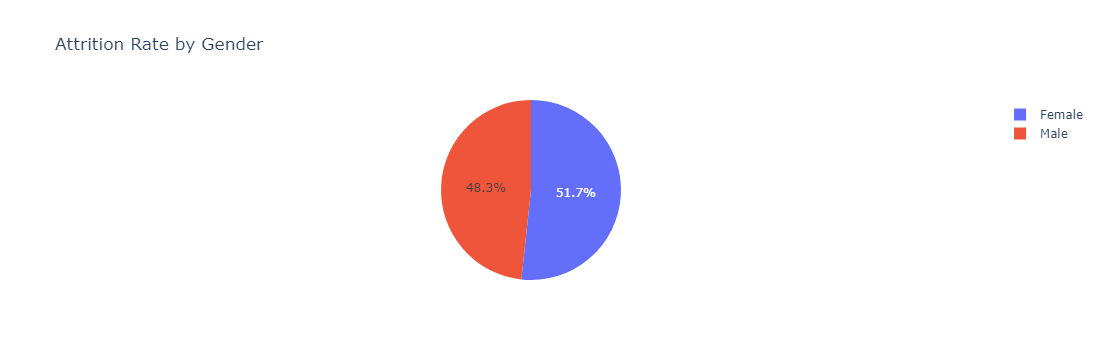

In [233]:
#Attrition rate by gender
gender_attrition = emp_attrition.groupby('Gender')['Attrition'].mean().reset_index()
gender_attrition['Attrition_Rate'] = gender_attrition['Attrition'] * 100
print(gender_attrition)
# Plot the data
fig = px.pie(gender_attrition, names='Gender', values='Attrition_Rate',
             title='Attrition Rate by Gender',
             labels={'Attrition_Rate': 'Attrition Rate (%)'},
             color=['#FCC981','#A7FCEF'])
fig.show()

#Female attrition is more as compared to male i.e 51%

    Department  Attrition
0  Engineering   0.534314
1      Finance   0.519417
2           HR   0.502618
3    Marketing   0.421053
4        Sales   0.492823


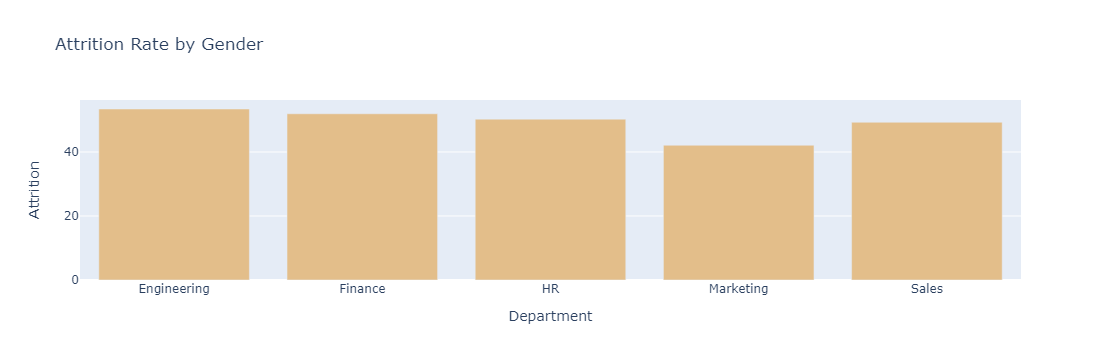

In [234]:
# Department feature by attrition feature
depart_attrition = emp_attrition.groupby('Department')['Attrition'].mean().reset_index()
print(depart_attrition)
depart_attrition['Attrition'] = depart_attrition['Attrition'] * 100  # Convert to percentage
# Plot the data
fig1 = px.bar(depart_attrition, x='Department', y='Attrition',
             title='Attrition Rate by Gender')
fig1.update_traces(marker_color='#E3BE8A')
fig1.show()

#Engineering department has more attrition i.e. 53%

   Attrition  count          mean           std      min      25%      50%  \
0          0  505.0  65383.287129  19896.212746  30532.0  48520.0  65708.0   
1          1  495.0  63851.353535  20621.822347  30099.0  46217.0  63425.0   

       75%      max  
0  82067.0  99991.0  
1  81563.5  99851.0  


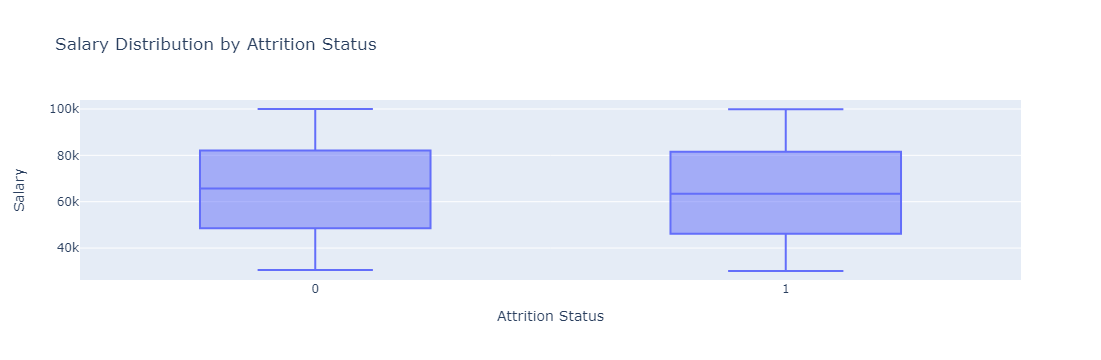

In [235]:
#Salary distribution by attrition feature
salary_attr=emp_attrition.groupby('Attrition')['Salary'].describe().reset_index()
print(salary_attr)

fig_box=px.box(emp_attrition, x='Attrition', y='Salary',title='Salary Distribution by Attrition Status', labels={'Attrition': 'Attrition Status', 'Salary': 'Salary'})
fig_box.show()

count: Number of employees in each attrition category. For attrition = 0: 505 employees For attrition = 1: 495 employees.
    
min: The minimum salary for each attrition status. For attrition = 0: Minimum salary is 30,532. For attrition = 1: Minimum salary is 30,099.

In [236]:
years_stats = emp_attrition['Promotion_Last_5Years'].describe()
satisfaction_stats = emp_attrition['Attrition'].describe()
# Correlation Analysis
correlation = emp_attrition[['Promotion_Last_5Years', 'Attrition']].corr().iloc[0, 1]
print(f"\nCorrelation between Promotion_Last_5Years and Attrition: {correlation:.2f}")



Correlation between Promotion_Last_5Years and Attrition: 0.02


The correlation coefficient (0.02) measures the linear relationship between Promotion_Last_5Years and Attrition.
A correlation of 0.02 indicates a very weak positive linear relationship between these two variables. 
In other words, promotions in the last 5 years have almost no linear impact on whether an employee leaves the company or not.

   Attrition  Employee_ID
0          0          505
1          1          495


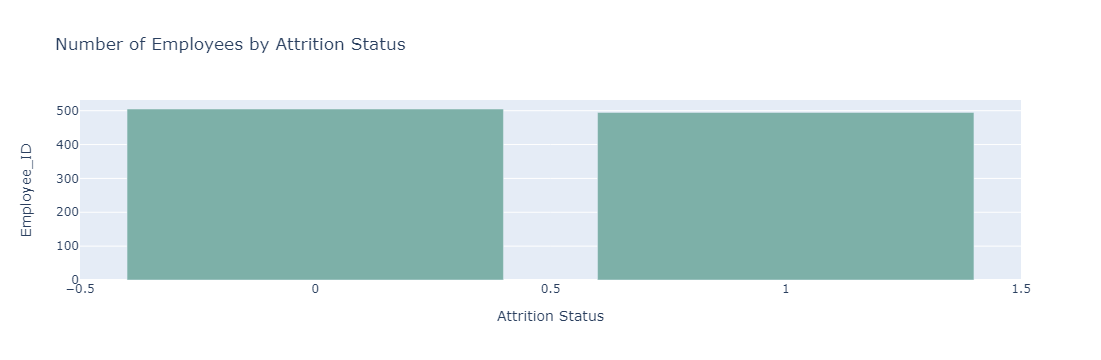

In [237]:
#Number of employee by attrition
promotion_attrition_count = emp_attrition.groupby('Attrition')['Employee_ID'].count().reset_index()
print(promotion_attrition_count)
# Bar plot
fig = px.bar(promotion_attrition_count, x='Attrition', y='Employee_ID', 
             title='Number of Employees by Attrition Status',
             labels={'Attrition': 'Attrition Status', 'Employee_Count': 'Number of Employees'})
fig.update_traces(marker_color='#7DB0A8')
fig.show()

The attrition rate is the proportion of employees who have left the organization. In this case, the attrition rate is approximately 49.5%.

    Department  Employee_ID
0  Engineering          204
1      Finance          206
2           HR          191
3    Marketing          190
4        Sales          209


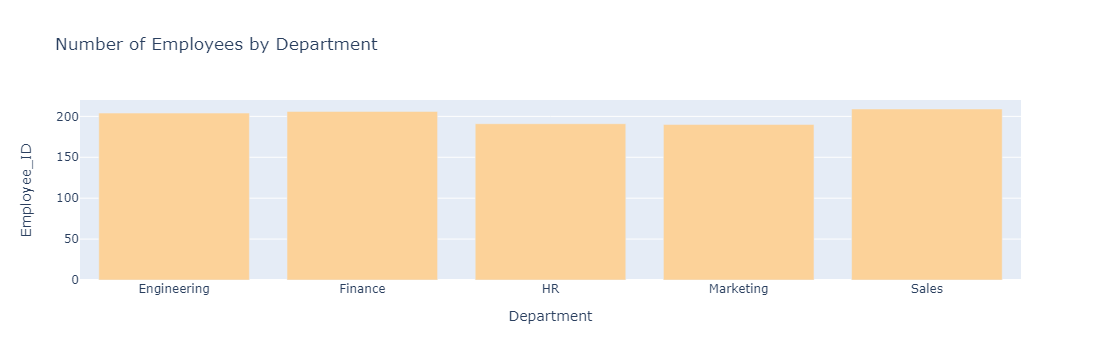

In [238]:
#Number of employees by department
emp_department=emp_attrition.groupby('Department')['Employee_ID'].count().reset_index()
print(emp_department)
fig=px.bar(emp_department,x='Department', y='Employee_ID', title='Number of Employees by Department',
             labels={'Department': 'Department', 'Employee_Count': 'Number of Employees'})
fig.update_traces(marker_color='#FCD299')
fig.show()

Sales department have higher number of employees 

       Job_Title  Employee_Count
0     Accountant             206
1        Analyst             195
2       Engineer             214
3  HR Specialist             179
4        Manager             206


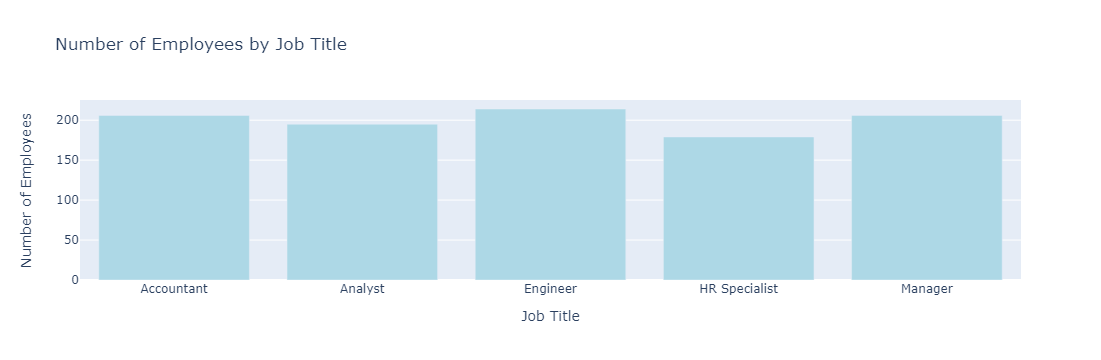

In [243]:
#number of employees by job title
emp_job = emp_attrition.groupby('Job_Title')['Employee_ID'].count().reset_index()
emp_job.columns = ['Job_Title', 'Employee_Count']
print(emp_job)

fig1 = px.bar(emp_job, x='Job_Title', y='Employee_Count', title='Number of Employees by Job Title', 
              labels={'Job_Title': 'Job Title', 'Employee_Count': 'Number of Employees'})
fig1.update_traces(marker_color='#ADD8E6')

fig1.show()

Engineer job_title has higher number of employees

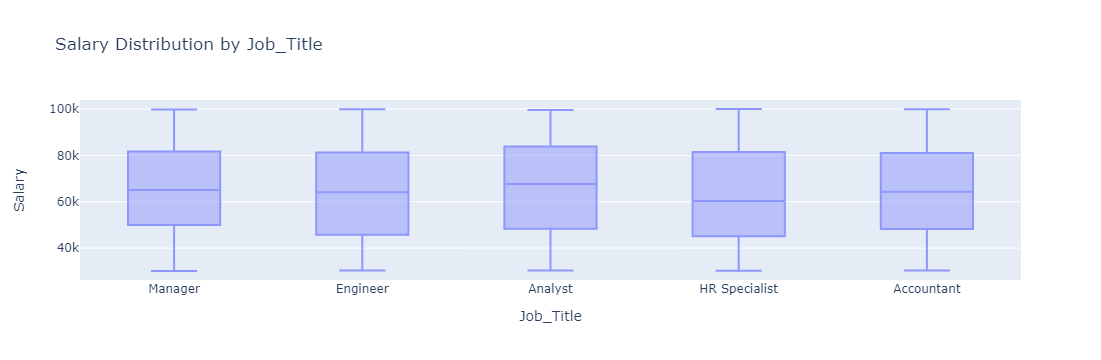

In [240]:
#Salary distribution by job_title
fig4=px.box(emp_attrition,x='Job_Title', y='Salary', title='Salary Distribution by Job_Title')
fig4.update_traces(marker_color='#8D97FC')
fig4.show()

All have similar min and max salary

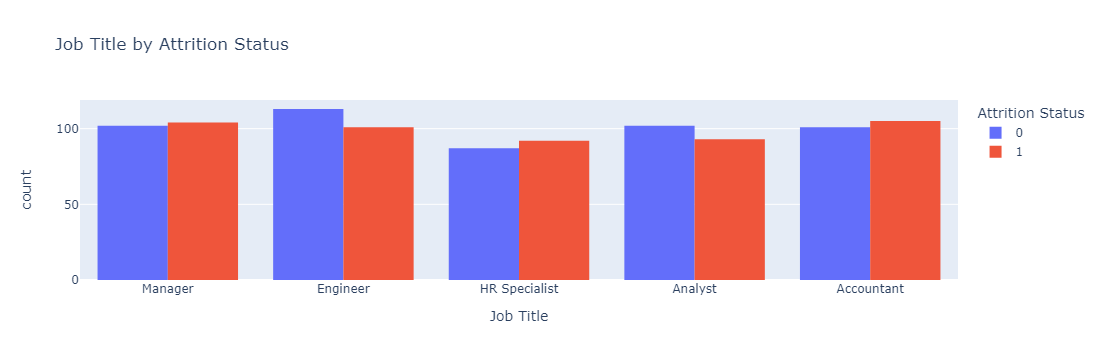

In [247]:
fig5 = px.histogram(emp_attrition, x='Job_Title', color='Attrition', barmode='group',
                   title='Job Title by Attrition Status',
                   labels={'Job_Title': 'Job Title', 'count': 'Number of Employees', 'Attrition': 'Attrition Status'})
fig5.show()

HR specialist has min attrition whereas Accountant has higher attrition rate 

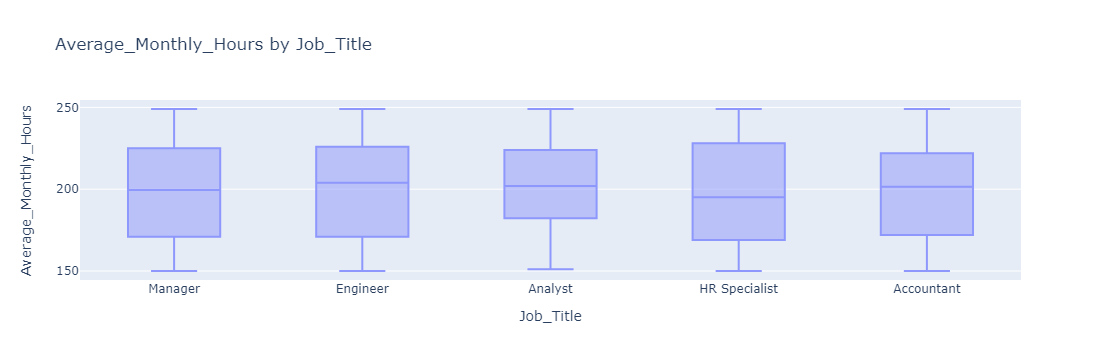

In [245]:
fig6=monthly_hour_job=px.box(emp_attrition, x='Job_Title', y='Average_Monthly_Hours',title='Average_Monthly_Hours by Job_Title')
fig6.update_traces(marker_color='#8D97FC')
fig6.show()

In that the min and max hour rate was similar but Analyst min hour is 151

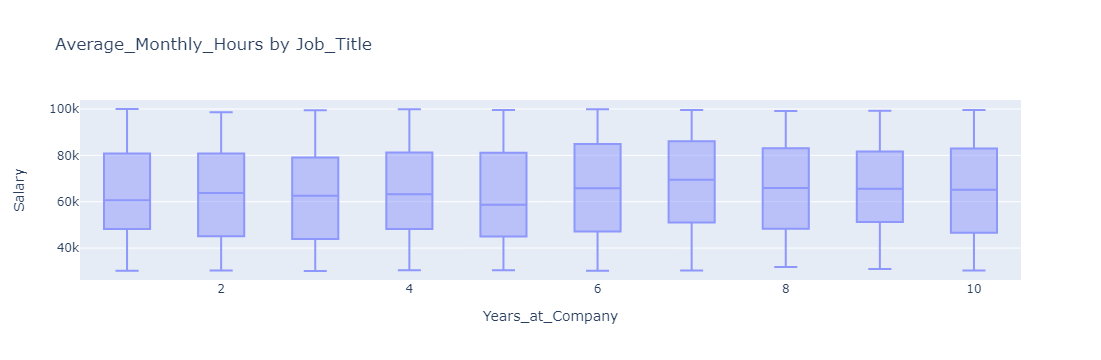

In [254]:
fig6=monthly_hour_job=px.box(emp_attrition, x='Years_at_Company', y='Salary',title='Average_Monthly_Hours by Job_Title')
fig6.update_traces(marker_color='#8D97FC')
fig6.show()

Not too much difference in salary all have approx similar max one is 98 and 99k whereas min is 30 or 31k. Matrix corr which we got bove i.e. also 0.03